In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_excel('AtlanticStormTotalsTable.xlsx', header=1)
df.set_index(df['Year'], inplace=True)
df.drop('Year', axis=1, inplace=True)
cols = df.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df.columns = cols

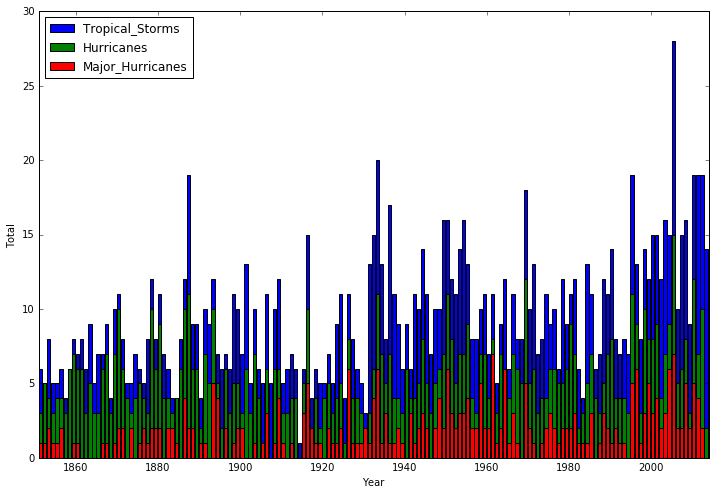

In [86]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.bar(df.index, df['Tropical_Storms'], label='Tropical_Storms')
ax.bar(df.index, df['Hurricanes'], label='Hurricanes', color='green')
ax.bar(df.index, df['Major_Hurricanes'], label='Major_Hurricanes', color='red')
ax.set_xlim(1851, 2014)
ax.set_xlabel('Year')
ax.set_ylabel('Total')
plt.legend(loc='upper left')

Tropical Storm Analysis

In [136]:
import pymc3 as pm
import theano.tensor as tt

count_data = df['Tropical_Storms'].values
n_count_data = len(df['Tropical_Storms'])
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

Applied log-transform to lambda_1 and added transformed lambda_1_log_ to model.
Applied log-transform to lambda_2 and added transformed lambda_2_log_ to model.


In [137]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = tt.switch(tau >= idx, lambda_1, lambda_2)

    observation = pm.Poisson("obs", lambda_, observed=count_data)

    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|██████████| 10000/10000 [00:02<00:00, 3846.28it/s]


In [138]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

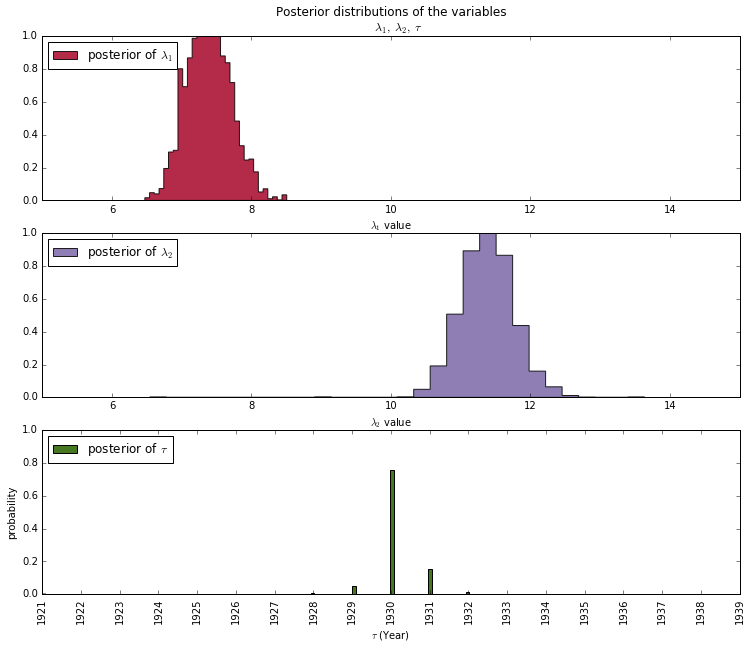

In [139]:
fig = plt.figure(figsize=(12.5,10))
ax = fig.add_subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([5, 15])
plt.xlabel("$\lambda_1$ value")

ax = fig.add_subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([5, 15])
plt.xlabel("$\lambda_2$ value")

ax = fig.add_subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
y, x ,_ = plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data), df.index, rotation='vertical')

plt.legend(loc="upper left")
plt.ylim([0, 1.0])
plt.xlim([70, 88])
plt.xlabel(r"$\tau$ (Year)")
plt.ylabel("probability");

In [140]:
print 'Switchpoint: {0}, {1} prob'.format(int(round(x[np.argmax(y)] + 1851, 0)), round(y.max(), 3))

Switchpoint: 1930, 0.755 prob


In [141]:
print 'Lambda_1: {0}, Lambda_2: {1}'.format(round(np.mean(lambda_1_samples), 2), round(np.mean(lambda_2_samples), 2))

Lambda_1: 7.39, Lambda_2: 11.38


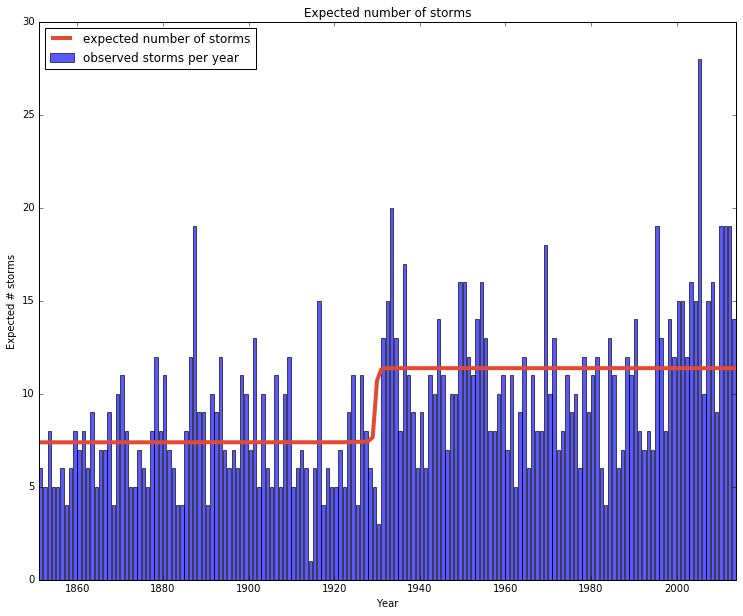

In [142]:
N = tau_samples.shape[0]
expected_storms_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_storms_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N

fig = plt.figure(figsize=(12.5,10))
plt.plot(df.index, expected_storms_per_day, lw=4, color="#E24A33",
         label="expected number of storms")
plt.xlim(1851, 2014)
plt.xlabel("Year")
plt.ylabel("Expected # storms")
plt.title("Expected number of storms")
plt.ylim(0, 30)
plt.bar(df.index, count_data, color="blue", alpha=0.65,
        label="observed storms per year")

plt.legend(loc="upper left");

Hurricane Analysis

In [128]:
count_data = df['Hurricanes'].values
n_count_data = len(df['Hurricanes'])
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

Applied log-transform to lambda_1 and added transformed lambda_1_log_ to model.
Applied log-transform to lambda_2 and added transformed lambda_2_log_ to model.


In [129]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = tt.switch(tau >= idx, lambda_1, lambda_2)

    observation = pm.Poisson("obs", lambda_, observed=count_data)

    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|██████████| 10000/10000 [00:02<00:00, 3624.56it/s]


In [130]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

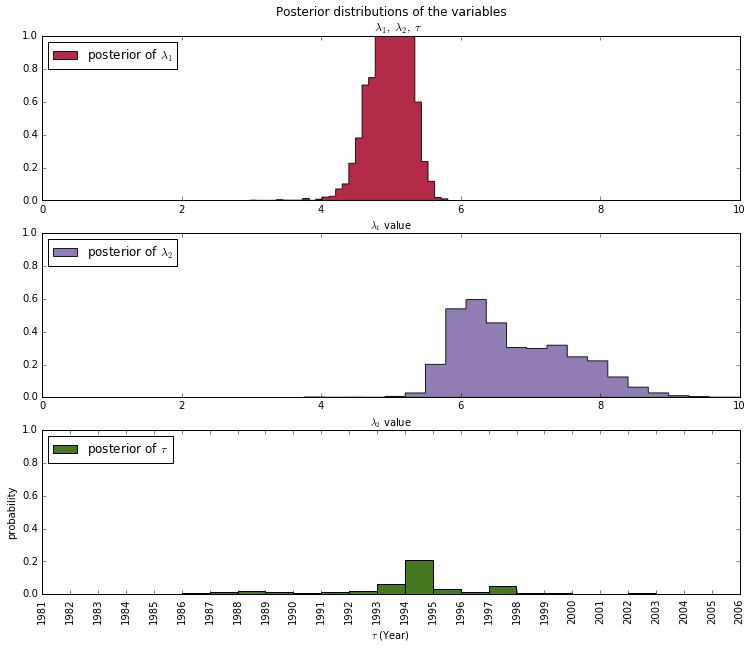

In [131]:
fig = plt.figure(figsize=(12.5,10))
ax = fig.add_subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([0, 10])
plt.xlabel("$\lambda_1$ value")

ax = fig.add_subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([0, 10])
plt.xlabel("$\lambda_2$ value")

ax = fig.add_subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
y, x ,_ = plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data), df.index, rotation='vertical')

plt.legend(loc="upper left")
plt.ylim([0, 1.0])
plt.xlim([130, 155])
plt.xlabel(r"$\tau$ (Year)")
plt.ylabel("probability");

In [132]:
print 'Switchpoint: {0}, {1} prob'.format(int(round(x[np.argmax(y)] + 1851, 0)), round(y.max(), 3))

Switchpoint: 1994, 0.211 prob


In [133]:
print 'Lambda_1: {0}, Lambda_2: {1}'.format(round(np.mean(lambda_1_samples), 2), round(np.mean(lambda_2_samples), 2))

Lambda_1: 4.99, Lambda_2: 6.78


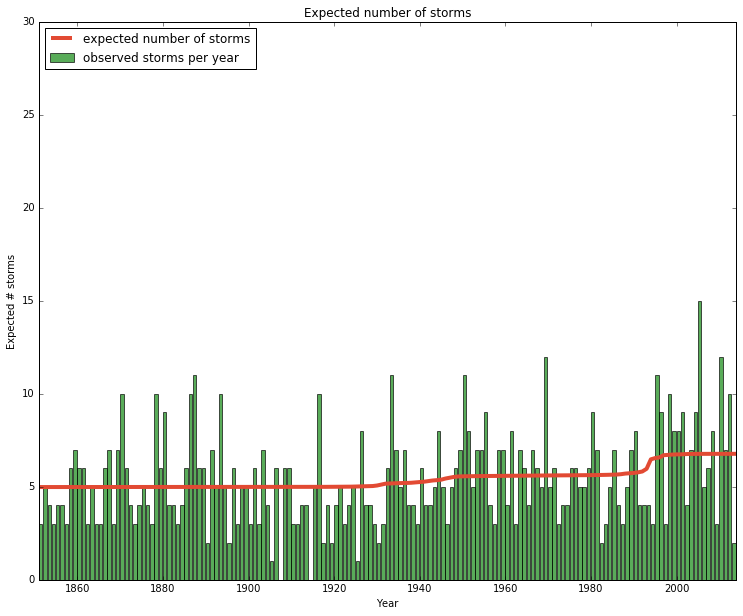

In [135]:
N = tau_samples.shape[0]
expected_storms_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_storms_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N

fig = plt.figure(figsize=(12.5,10))
plt.plot(df.index, expected_storms_per_day, lw=4, color="#E24A33",
         label="expected number of storms")
plt.xlim(1851, 2014)
plt.xlabel("Year")
plt.ylabel("Expected # storms")
plt.title("Expected number of storms")
plt.ylim(0, 30)
plt.bar(df.index, count_data, color="green", alpha=0.65,
        label="observed storms per year")

plt.legend(loc="upper left");

Major Hurricane Analysis

In [114]:
count_data = df['Major_Hurricanes'].values
n_count_data = len(df['Major_Hurricanes'])
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

Applied log-transform to lambda_1 and added transformed lambda_1_log_ to model.
Applied log-transform to lambda_2 and added transformed lambda_2_log_ to model.


In [115]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = tt.switch(tau >= idx, lambda_1, lambda_2)

    observation = pm.Poisson("obs", lambda_, observed=count_data)

    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|██████████| 10000/10000 [00:02<00:00, 3702.45it/s]


In [116]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

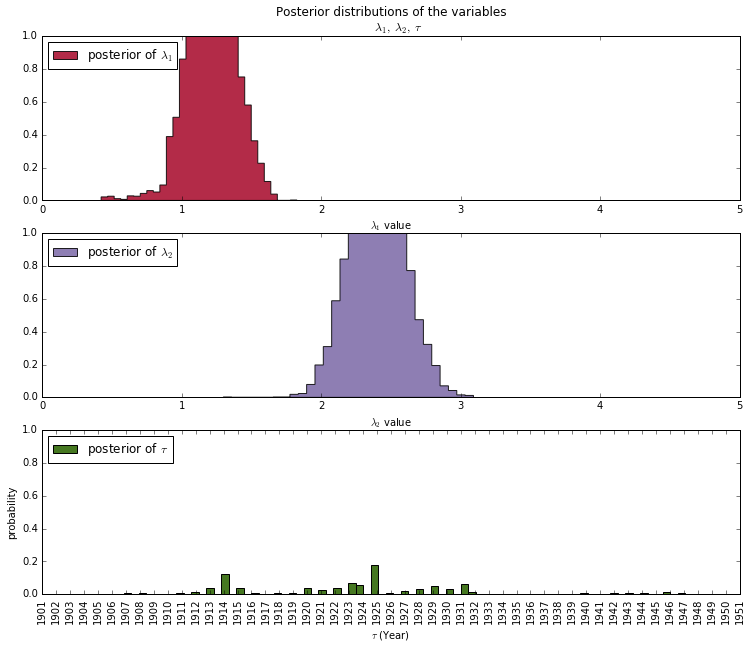

In [117]:
fig = plt.figure(figsize=(12.5,10))
ax = fig.add_subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([0, 5])
plt.xlabel("$\lambda_1$ value")

ax = fig.add_subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([0, 5])
plt.xlabel("$\lambda_2$ value")

ax = fig.add_subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
y, x ,_ = plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data), df.index, rotation='vertical')

plt.legend(loc="upper left")
plt.ylim([0, 1.0])
plt.xlim([50, 100])
plt.xlabel(r"$\tau$ (Year)")
plt.ylabel("probability");

In [118]:
print 'Switchpoint: {0}, {1} prob'.format(int(round(x[np.argmax(y)] + 1851, 0)), round(y.max(), 3))

Switchpoint: 1925, 0.177 prob


In [119]:
print 'Lambda_1: {0}, Lambda_2: {1}'.format(round(np.mean(lambda_1_samples), 2), round(np.mean(lambda_2_samples), 2))

Lambda_1: 1.21, Lambda_2: 2.39


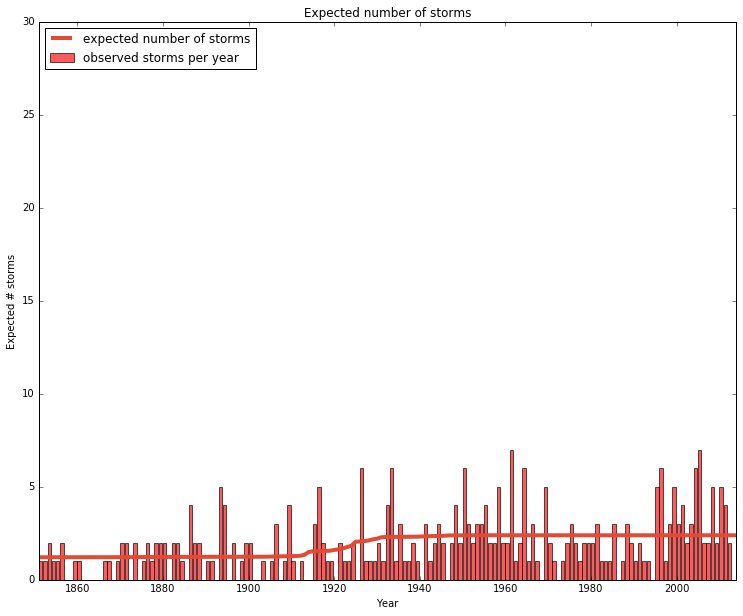

In [127]:
N = tau_samples.shape[0]
expected_storms_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_storms_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N

fig = plt.figure(figsize=(12.5,10))
plt.plot(df.index, expected_storms_per_day, lw=4, color="#E24A33",
         label="expected number of storms")
plt.xlim(1851, 2014)
plt.xlabel("Year")
plt.ylabel("Expected # storms")
plt.title("Expected number of storms")
plt.ylim(0, 30)
plt.bar(df.index, count_data, color="red", alpha=0.65,
        label="observed storms per year")

plt.legend(loc="upper left");

In [149]:
dftemp = pd.read_csv('global_temperature.csv')
dftemp = dftemp[dftemp['Source'] == 'GCAG'].sort_values('Year')
dfsunspot = pd.read_fwf('SN_y_tot_v2.0.txt', colspecs=[(0,6), (8,13)])
dfsunspot.columns = ['Year', 'Mean']
dfsunspot['Year'] = dfsunspot['Year'].astype(int)

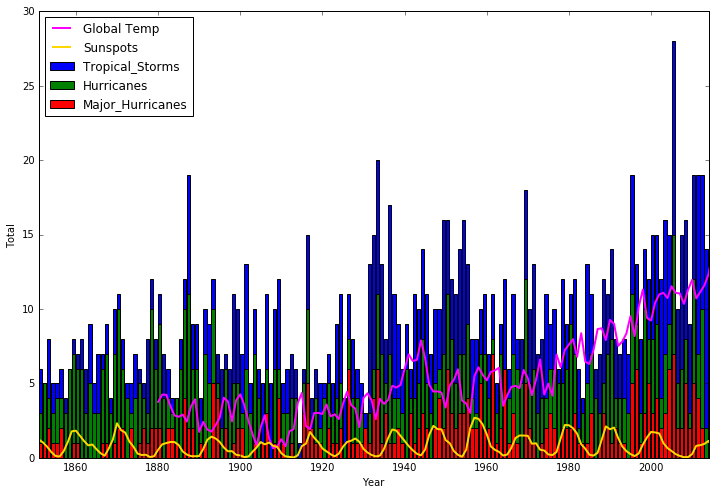

In [156]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.bar(df.index, df['Tropical_Storms'], label='Tropical_Storms')
ax.bar(df.index, df['Hurricanes'], label='Hurricanes', color='green')
ax.bar(df.index, df['Major_Hurricanes'], label='Major_Hurricanes', color='red')
ax.plot(dftemp['Year'], dftemp['Mean']*10+5, label='Global Temp', color='magenta', lw=2)
ax.plot(dfsunspot['Year'], dfsunspot['Mean']/100, label='Sunspots', color='gold', lw=2)
ax.set_xlim(1851, 2014)
ax.set_xlabel('Year')
ax.set_ylabel('Total')
plt.legend(loc='upper left')